In [51]:
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [77]:
socrata_domain = "data.calgary.ca"              #<--- Open database
socrata_identifier = "78gh-n26t"                #<--- Calgary Crime Stats Dataset
app_token = 'hTDCmDPAMga7ZzENEaEhREweG'         #<--- Removes throttle limit
map_token = 'pk.eyJ1Ijoic3dhaW5sYW5jYXN0ZXIiLCJhIjoiY2t2MnY0eGp5MGZobTJucDZ1MGczN3RoZiJ9.rb_P-r0XJgLxmnq6pjGVig' #<--- plotly map token
query_2021 = "year = '2021'"

client = Socrata(socrata_domain, app_token)
results = client.get_all(socrata_identifier, where = query_2021) 

df_calgary = pd.DataFrame.from_records(results)
df_calgary.tail()


,sector,community_name,category,crime_count,resident_count,date,year,month,long,lat,id,community_center_point
8025,CENTRE,BANKVIEW,Break & Enter - Other Premises,1,NaN,2021-02-01T00:00:00.000,2021,FEB,-114.1004892,51.03413124,2021-FEB-BANKVIEW-Break & Enter - Other Premises,"{'type': 'Point', 'coordinates': [-114.1004892..."
8026,CENTRE,RENFREW,Violence Other (Non-domestic),1,NaN,2021-03-01T00:00:00.000,2021,MAR,-114.0391758,51.05965845,2021-MAR-RENFREW-Violence Other (Non-domestic),"{'type': 'Point', 'coordinates': [-114.0391758..."
8027,EAST,DOVER,Break & Enter - Commercial,1,NaN,2021-01-01T00:00:00.000,2021,JAN,-113.9931505,51.02246299,2021-JAN-DOVER-Break & Enter - Commercial,"{'type': 'Point', 'coordinates': [-113.9931505..."
8028,NORTH,COVENTRY HILLS,Break & Enter - Commercial,1,NaN,2021-01-01T00:00:00.000,2021,JAN,-114.0531434,51.16490633,2021-JAN-COVENTRY HILLS-Break & Enter - Commer...,"{'type': 'Point', 'coordinates': [-114.0531434..."
8029,NORTHWEST,ROCKY RIDGE,Break & Enter - Dwelling,1,NaN,2021-02-01T00:00:00.000,2021,FEB,-114.245899,51.14421495,2021-FEB-ROCKY RIDGE-Break & Enter - Dwelling,"{'type': 'Point', 'coordinates': [-114.245899,..."


In [3]:
### Clean Data ###
df_calgary = df_calgary.iloc[:,0:11]            #<--- I only need the first 11 columns
df_calgary.dtypes                               #<--- Check data types for each column

sector            object
community_name    object
category          object
crime_count       object
resident_count    object
date              object
year              object
month             object
long              object
lat               object
id                object
dtype: object

In [78]:
#I need to change columns: crime_count,resident_count, long and lat to integers, date to date time
df_calgary['crime_count'] = pd.to_numeric(df_calgary['crime_count'])
df_calgary['resident_count'] = pd.to_numeric(df_calgary['resident_count'])
df_calgary['long'] = pd.to_numeric(df_calgary['long'])
df_calgary['lat'] = pd.to_numeric(df_calgary['lat'])

#Convert date
df_calgary['date'] = df_calgary['date'].str[:7]
df_calgary['date'] = pd.to_datetime(df_calgary['date'])

In [79]:
df_calgary.dtypes 

sector                            object
community_name                    object
category                          object
crime_count                        int64
resident_count                   float64
date                      datetime64[ns]
year                              object
month                             object
long                             float64
lat                              float64
id                                object
community_center_point            object
dtype: object

In [122]:
### Exploratory Data Analysis ###
case_count = len(df_calgary)
crimes_charged = df_calgary['crime_count'].sum()

print("In 2021, the number of crime cases in Calgary is:", case_count)
print("In 2021, the number of crimes charged in Calgary is:", crimes_charged,)

In 2021, the total number of crime cases in Calgary is: 8030
In 2021, the total number of crimes charged in Calgary is: 20472


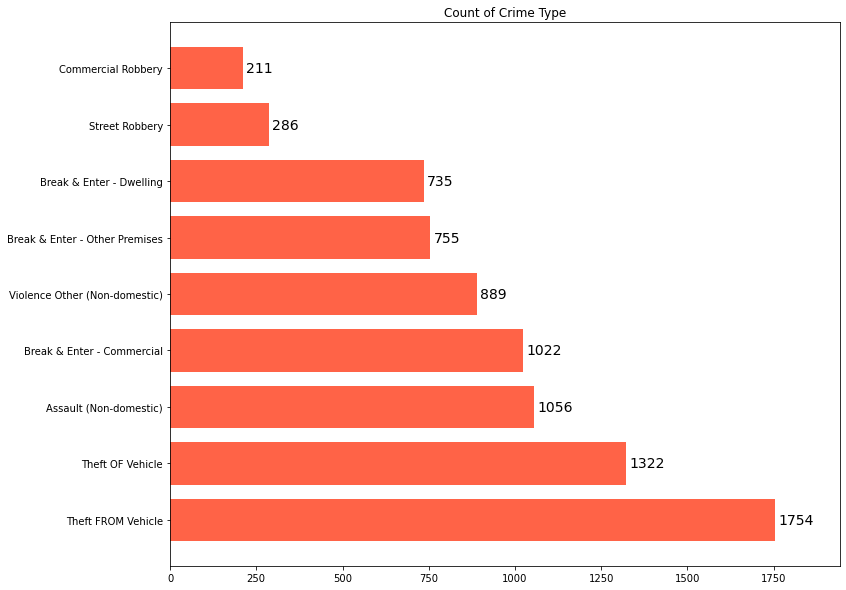

In [162]:
#Types of Crime
y = df_calgary['category'].value_counts()
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(y.index, y, height=0.75, color="tomato")
plt.title('Count of Crime Type')
_, xmax = plt.xlim()
plt.xlim(0, xmax+100)

for i, v in enumerate(y):                   #<--- Add data labels
    ax.text(v + 10, i, str(v), color='black', fontsize=14, ha='left', va='center')
plt.show()

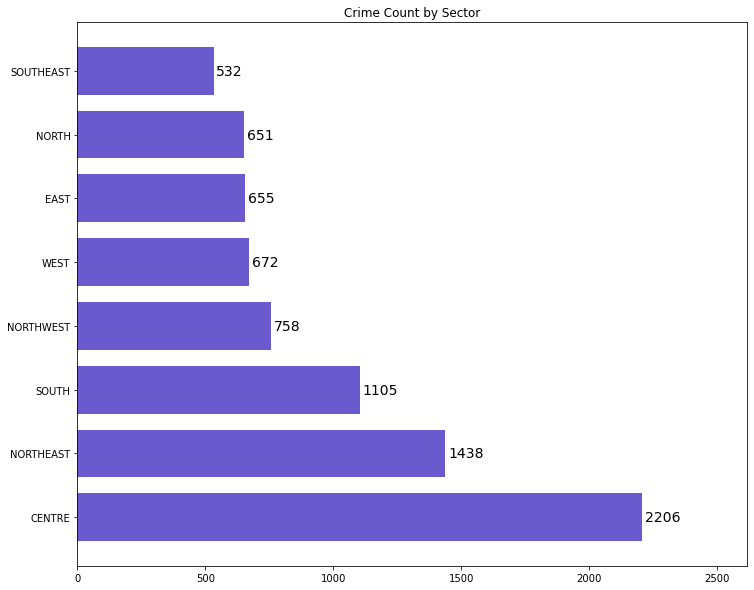

In [132]:
#Crime Count by Sector
y = df_calgary['sector'].value_counts(ascending=False)
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(y.index, y, height=0.75, color="slateblue")
plt.title('Crime Count by Sector')
_, xmax = plt.xlim()
plt.xlim(0, xmax+300)

for i, v in enumerate(y):                   #<--- Add data labels
    ax.text(v + 10, i, str(v), color='black', fontsize=14, ha='left', va='center')
plt.show()

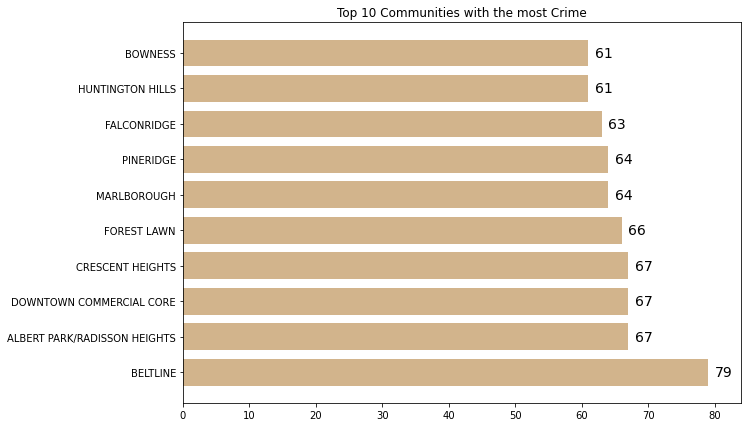

In [176]:
#Crime Count by Community
y = df_calgary['community_name'].value_counts()[:10] #<--- Top 10 Communities with the most crime.

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(y.index, y, height=0.75, color="tan")
plt.title('Top 10 Communities with the most Crime')
_, xmax = plt.xlim()
plt.xlim(0, xmax+1)

for i, v in enumerate(y):                   #<--- Add data labels
    ax.text(v + 1, i, str(v), color='black', fontsize=14, ha='left', va='center')
plt.show()

In [188]:
x = df_calgary['community_name'].value_counts().loc[lambda x : x >= 50].count()
print(x, "Communities have a crime count of at least 50") #So far it shows that

48 Communities have a crime count of at least 50


In [201]:

px.set_mapbox_access_token(map_token)
fig = px.scatter_mapbox(df_calgary, lat="lat", lon="long", color="category", size="crime_count",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()